In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Preprocessing the raw data

In [2]:
# iterate over all WASDE csv files in the data folder and vertically concatenate them

path = 'data collection/WASDE data/*/*.csv'
all_files = glob.glob(path)
df_from_each_file = (pd.read_csv(f, low_memory=False) for f in all_files)
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
print(concatenated_df.shape)
concatenated_df.head()

(832923, 16)


,WasdeNumber,ReportDate,ReportTitle,Attribute,ReliabilityProjection,Commodity,Region,MarketYear,ProjEstFlag,AnnualQuarterFlag,Value,Unit,ReleaseDate,ReleaseTime,ForecastYear,ForecastMonth
0,627,August 2022,Mexico Sugar Supply and Use and High Fructose ...,Beginning Stocks,NaN,Sugar,Mexico,2021/22,Est.,Annual,1053.0,"1000 Metric Tons, Actual Weight",2022-08-12,12:00:00.0000000,2022,8
1,627,August 2022,Mexico Sugar Supply and Use and High Fructose ...,Domestic,NaN,Sugar,Mexico,2021/22,Est.,Annual,4547.0,"1000 Metric Tons, Actual Weight",2022-08-12,12:00:00.0000000,2022,8
2,627,August 2022,Mexico Sugar Supply and Use and High Fructose ...,Ending Stocks,NaN,Sugar,Mexico,2021/22,Est.,Annual,947.0,"1000 Metric Tons, Actual Weight",2022-08-12,12:00:00.0000000,2022,8
3,627,August 2022,Mexico Sugar Supply and Use and High Fructose ...,Exports,NaN,Sugar,Mexico,2021/22,Est.,Annual,1794.0,"1000 Metric Tons, Actual Weight",2022-08-12,12:00:00.0000000,2022,8
4,627,August 2022,Mexico Sugar Supply and Use and High Fructose ...,Imports,NaN,Sugar,Mexico,2021/22,Est.,Annual,50.0,"1000 Metric Tons, Actual Weight",2022-08-12,12:00:00.0000000,2022,8


In [11]:
crude_oil_df = pd.read_csv('data collection/Crude Oil WTI Futures Historical Data - daily data 10 years.csv')
food_price_df = pd.read_csv('data collection/Food_price_indices_data_jul.csv')
gold_df = pd.read_csv('data collection/Gold Futures Historical Data - daily data 10 years.csv')
sp500_df = pd.read_csv('data collection/S&P 500 Historical Data - daily data 10 years.csv')
silver_df = pd.read_csv('data collection/Silver Futures Historical Data - daily data 10 years.csv')
corn_df = pd.read_csv('data collection/US Corn Futures Historical Data - daily data 10 years.csv')
dollar_rate_df = pd.read_csv('data collection/US Dollar Index Historical Data - daily data 10 years.csv')
soybean_df = pd.read_csv('data collection/US Soybeans Futures Historical Data - daily data 10 years.csv')

dfs_dict = {
    'crude_oil_df': crude_oil_df,
    #'food_price_df': food_price_df,
    'gold_df': gold_df,
    'sp500_df': sp500_df,
    'silver_df': silver_df,
    'corn_df': corn_df,
    'dollar_rate_df': dollar_rate_df,
    'soybean_df': soybean_df
}

In [12]:
dfs_dict

{'crude_oil_df':             Date  Price   Open   High    Low     Vol. Change %
 0     07/29/2024  75.56  77.28  77.69  75.52      NaN   -2.21%
 1     07/28/2024  77.27  77.47  77.48  77.22      NaN    0.14%
 2     07/26/2024  77.16  78.35  78.60  76.19  365.12K   -1.43%
 3     07/25/2024  78.28  77.50  78.47  76.04  457.29K    0.89%
 4     07/24/2024  77.59  77.45  78.19  76.98  355.97K    0.82%
 ...          ...    ...    ...    ...    ...      ...      ...
 3039  01/08/2013  93.15  93.32  93.80  92.67  195.87K   -0.04%
 3040  01/07/2013  93.19  93.21  93.35  92.42  166.29K    0.11%
 3041  01/04/2013  93.09  92.86  93.21  91.52  210.75K    0.18%
 3042  01/03/2013  92.92  92.91  93.30  92.49  189.81K   -0.21%
 3043  01/02/2013  93.12  91.78  93.87  91.56  203.87K    1.42%
 
 [3044 rows x 7 columns],
 'gold_df':             Date     Price      Open      High       Low     Vol. Change %
 0     07/29/2024  2,435.05  2,443.30  2,448.40  2,430.65      NaN   -0.33%
 1     07/28/2024  2,443.

In [5]:
# Identify and drop columns that start with "Unnamed"
food_price_df = food_price_df.loc[:, ~food_price_df.columns.str.startswith('Unnamed')]
food_price_df.head()

,Date,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar
0,1990-01,64.1,73.4,53.5,64.1,44.59,87.9
1,1990-02,64.5,76.0,52.2,62.2,44.50,90.7
2,1990-03,63.8,77.8,41.4,61.3,45.75,95.1
3,1990-04,65.8,80.4,48.4,62.8,44.02,94.3
4,1990-05,64.4,81.0,39.2,62.0,45.50,90.4


Overview of crude_oil_df


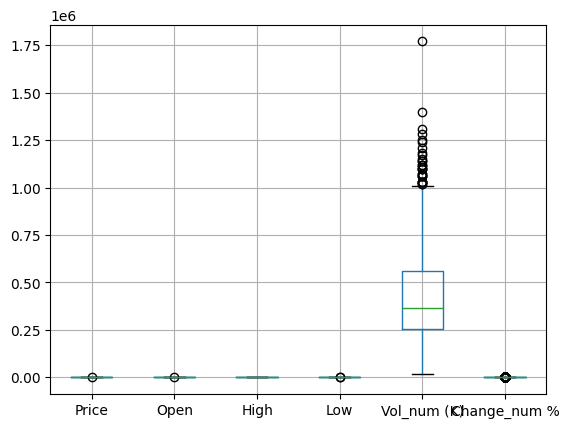

Overview of gold_df


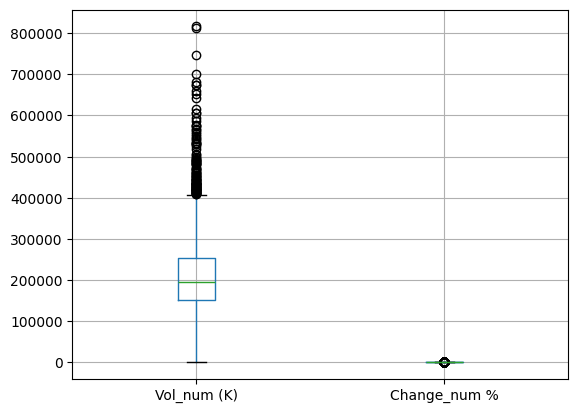

Overview of sp500_df


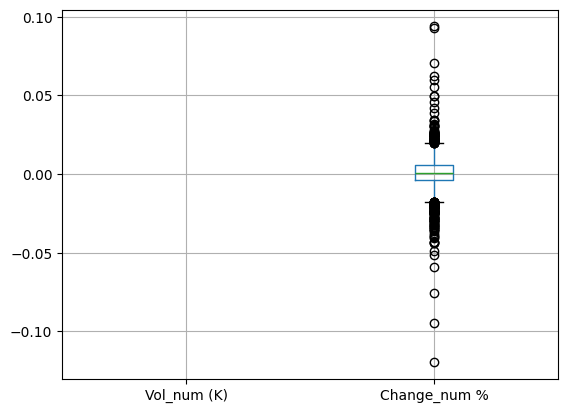

Overview of silver_df


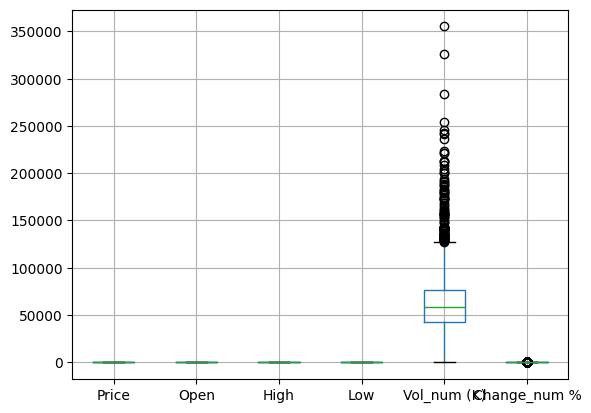

Overview of corn_df


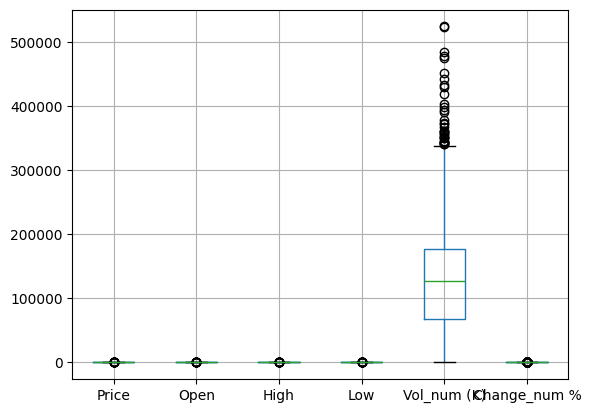

Overview of dollar_rate_df


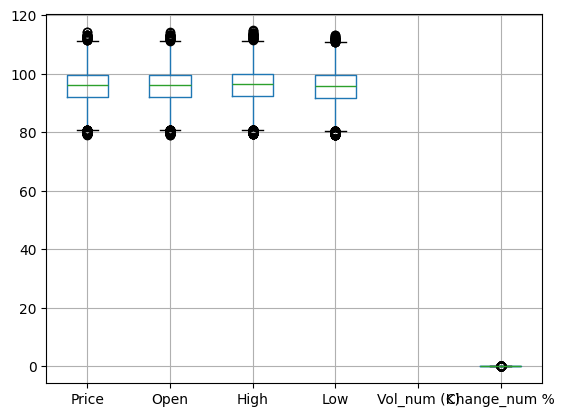

Overview of soybean_df


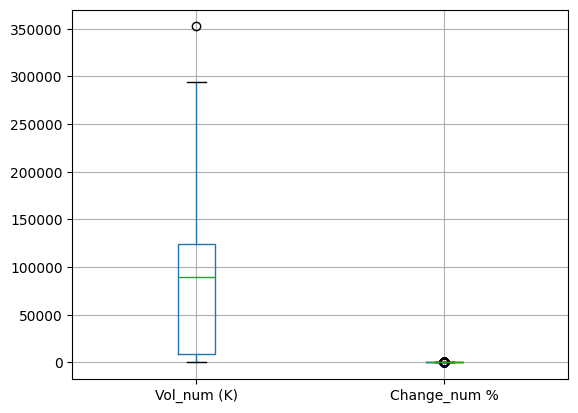

In [6]:
def replace_symbols(value):
    if isinstance(value, (int, float, complex)):
        return value
    if '%' in value:
        return float(value.replace('%', '')) / 100
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    
 
for df_name, df in dfs_dict.items():
    try:
        df['Vol_num (K)'] = df['Vol.'].apply(replace_symbols)
        df['Change_num %'] = df['Change %'].apply(replace_symbols)
        print(f"Overview of {df_name}")
        plt.figure()
        df[['Price', 'Open', 'High', 'Low', 'Vol_num (K)', 'Change_num %']].boxplot()
        plt.show()
    except Exception as e:
        print(f"Error with {df_name}: {e}")
        continue



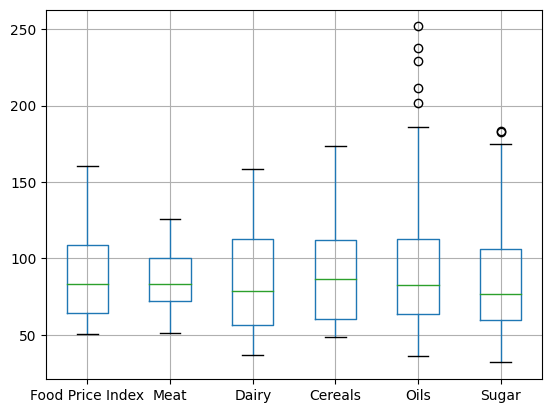

In [47]:
food_price_df.boxplot()
plt.show()

In [13]:
for df in dfs_dict.values():
    df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to include dataframe name as prefix
for name, df in dfs_dict.items():
    prefix = name.replace('_df', '')  # Remove '_df' from dataframe name
    df.rename(columns=lambda x: f"{prefix}_{x}" if x != 'Date' else x, inplace=True)

# Start with the first dataframe
merged_df = list(dfs_dict.values())[0]

# Iteratively merge remaining dataframes
for df in list(dfs_dict.values())[1:]:
    merged_df = pd.merge(merged_df, df, on='Date', how='outer')

           Date  crude_oil_Price  crude_oil_Open  crude_oil_High  \
0    2013-01-01              NaN             NaN             NaN   
1    2013-01-02            93.12           91.78           93.87   
2    2013-01-03            92.92           92.91           93.30   
3    2013-01-04            93.09           92.86           93.21   
4    2013-01-06              NaN             NaN             NaN   
...         ...              ...             ...             ...   
3083 2024-07-24            77.59           77.45           78.19   
3084 2024-07-25            78.28           77.50           78.47   
3085 2024-07-26            77.16           78.35           78.60   
3086 2024-07-28            77.27           77.47           77.48   
3087 2024-07-29            75.56           77.28           77.69   

      crude_oil_Low crude_oil_Vol. crude_oil_Change % gold_Price gold_Open  \
0               NaN            NaN                NaN        NaN       NaN   
1             91.56        

In [14]:
merged_df

,Date,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Price,gold_Open,gold_High,...,dollar_rate_High,dollar_rate_Low,dollar_rate_Vol.,dollar_rate_Change %,soybean_Price,soybean_Open,soybean_High,soybean_Low,soybean_Vol.,soybean_Change %
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,79.82,79.65,NaN,0.00%,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,93.12,91.78,93.87,91.56,203.87K,1.42%,"1,688.80","1,676.40","1,695.40",...,79.93,79.28,NaN,0.09%,"1,393.13","1,432.63","1,433.00","1,386.38",NaN,-1.09%
2,2013-01-03,92.92,92.91,93.30,92.49,189.81K,-0.21%,"1,674.60","1,686.20","1,690.50",...,80.59,79.80,NaN,0.68%,"1,391.25","1,393.13","1,395.63","1,372.63",NaN,-0.13%
3,2013-01-04,93.09,92.86,93.21,91.52,210.75K,0.18%,"1,648.90","1,663.80","1,664.50",...,80.87,80.41,NaN,0.15%,"1,365.75","1,391.38","1,397.13","1,356.13",NaN,-1.83%
4,2013-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"1,363.25","1,367.13","1,367.25","1,357.63",NaN,-0.18%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,2024-07-24,77.59,77.45,78.19,76.98,355.97K,0.82%,"2,464.00","2,458.10","2,481.10",...,104.56,104.12,NaN,-0.06%,"1,060.25","1,069.75","1,075.50","1,059.00",23.86K,-1.07%
3084,2024-07-25,78.28,77.50,78.47,76.04,457.29K,0.89%,"2,399.90","2,446.20","2,448.40",...,104.46,104.08,NaN,-0.03%,"1,074.50","1,060.75","1,076.75","1,054.25",29.42K,1.34%
3085,2024-07-26,77.16,78.35,78.60,76.19,365.12K,-1.43%,"2,427.90","2,409.90","2,436.70",...,104.45,104.21,NaN,-0.04%,"1,042.00","1,068.75","1,075.75","1,038.75",39.48K,-3.02%
3086,2024-07-28,77.27,77.47,77.48,77.22,NaN,0.14%,"2,443.05","2,433.55","2,449.20",...,104.37,104.29,NaN,0.06%,"1,037.88","1,041.50","1,041.50","1,034.00",NaN,-0.40%


In [34]:
cleaned_df = merged_df.dropna(axis=1, how='all')
cleaned_df

,Date,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Price,gold_Open,gold_High,...,dollar_rate_Open,dollar_rate_High,dollar_rate_Low,dollar_rate_Change %,soybean_Price,soybean_Open,soybean_High,soybean_Low,soybean_Vol.,soybean_Change %
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,79.69,79.82,79.65,0.00%,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,93.12,91.78,93.87,91.56,203.87K,1.42%,"1,688.80","1,676.40","1,695.40",...,79.75,79.93,79.28,0.09%,"1,393.13","1,432.63","1,433.00","1,386.38",NaN,-1.09%
2,2013-01-03,92.92,92.91,93.30,92.49,189.81K,-0.21%,"1,674.60","1,686.20","1,690.50",...,79.81,80.59,79.80,0.68%,"1,391.25","1,393.13","1,395.63","1,372.63",NaN,-0.13%
3,2013-01-04,93.09,92.86,93.21,91.52,210.75K,0.18%,"1,648.90","1,663.80","1,664.50",...,80.57,80.87,80.41,0.15%,"1,365.75","1,391.38","1,397.13","1,356.13",NaN,-1.83%
4,2013-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"1,363.25","1,367.13","1,367.25","1,357.63",NaN,-0.18%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,2024-07-24,77.59,77.45,78.19,76.98,355.97K,0.82%,"2,464.00","2,458.10","2,481.10",...,104.48,104.56,104.12,-0.06%,"1,060.25","1,069.75","1,075.50","1,059.00",23.86K,-1.07%
3084,2024-07-25,78.28,77.50,78.47,76.04,457.29K,0.89%,"2,399.90","2,446.20","2,448.40",...,104.38,104.46,104.08,-0.03%,"1,074.50","1,060.75","1,076.75","1,054.25",29.42K,1.34%
3085,2024-07-26,77.16,78.35,78.60,76.19,365.12K,-1.43%,"2,427.90","2,409.90","2,436.70",...,104.36,104.45,104.21,-0.04%,"1,042.00","1,068.75","1,075.75","1,038.75",39.48K,-3.02%
3086,2024-07-28,77.27,77.47,77.48,77.22,NaN,0.14%,"2,443.05","2,433.55","2,449.20",...,104.33,104.37,104.29,0.06%,"1,037.88","1,041.50","1,041.50","1,034.00",NaN,-0.40%


In [35]:
# Filling NaNs of Sundays (there are Nans on Sundays in all colums except of soybean prices)
sunday_nan_columns = [col for col in cleaned_df.columns if not col.startswith('soy')]
sunday_nan_columns.remove('Date')
cleaned_df[sunday_nan_columns] = cleaned_df[sunday_nan_columns].fillna(method='ffill')
cleaned_df['is_holiday'] = 0
# Update 'is_holiday' to 1 where 'soybean_Price' is NaN
cleaned_df.loc[cleaned_df['soybean_Price'].isna(), 'is_holiday'] = 1
cleaned_df

/var/folders/zp/tjm6hdl95rjgm9v39jqzvwb00000gq/T/ipykernel_75057/907674799.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_df[sunday_nan_columns] = cleaned_df[sunday_nan_columns].fillna(method='ffill')
/var/folders/zp/tjm6hdl95rjgm9v39jqzvwb00000gq/T/ipykernel_75057/907674799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[sunday_nan_columns] = cleaned_df[sunday_nan_columns].fillna(method='ffill')
/var/folders/zp/tjm6hdl95rjgm9v39jqzvwb00000gq/T/ipykernel_75057/907674799.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,Date,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Price,gold_Open,gold_High,...,dollar_rate_High,dollar_rate_Low,dollar_rate_Change %,soybean_Price,soybean_Open,soybean_High,soybean_Low,soybean_Vol.,soybean_Change %,is_holiday
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,79.82,79.65,0.00%,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2013-01-02,93.12,91.78,93.87,91.56,203.87K,1.42%,"1,688.80","1,676.40","1,695.40",...,79.93,79.28,0.09%,"1,393.13","1,432.63","1,433.00","1,386.38",NaN,-1.09%,0
2,2013-01-03,92.92,92.91,93.30,92.49,189.81K,-0.21%,"1,674.60","1,686.20","1,690.50",...,80.59,79.80,0.68%,"1,391.25","1,393.13","1,395.63","1,372.63",NaN,-0.13%,0
3,2013-01-04,93.09,92.86,93.21,91.52,210.75K,0.18%,"1,648.90","1,663.80","1,664.50",...,80.87,80.41,0.15%,"1,365.75","1,391.38","1,397.13","1,356.13",NaN,-1.83%,0
4,2013-01-06,93.09,92.86,93.21,91.52,210.75K,0.18%,"1,648.90","1,663.80","1,664.50",...,80.87,80.41,0.15%,"1,363.25","1,367.13","1,367.25","1,357.63",NaN,-0.18%,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,2024-07-24,77.59,77.45,78.19,76.98,355.97K,0.82%,"2,464.00","2,458.10","2,481.10",...,104.56,104.12,-0.06%,"1,060.25","1,069.75","1,075.50","1,059.00",23.86K,-1.07%,0
3084,2024-07-25,78.28,77.50,78.47,76.04,457.29K,0.89%,"2,399.90","2,446.20","2,448.40",...,104.46,104.08,-0.03%,"1,074.50","1,060.75","1,076.75","1,054.25",29.42K,1.34%,0
3085,2024-07-26,77.16,78.35,78.60,76.19,365.12K,-1.43%,"2,427.90","2,409.90","2,436.70",...,104.45,104.21,-0.04%,"1,042.00","1,068.75","1,075.75","1,038.75",39.48K,-3.02%,0
3086,2024-07-28,77.27,77.47,77.48,77.22,365.12K,0.14%,"2,443.05","2,433.55","2,449.20",...,104.37,104.29,0.06%,"1,037.88","1,041.50","1,041.50","1,034.00",NaN,-0.40%,0
